In [1]:
# import de bibliotecas

import numpy as np
import cv2
from skimage.filters import threshold_multiotsu
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt

## Segmentação manual e automática (OTSU)

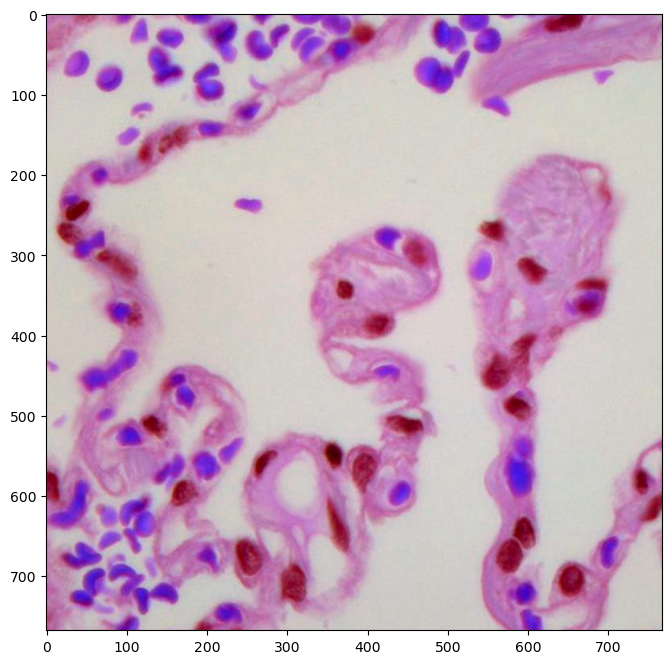

In [35]:
img = cv2.imread("../Images_data/single_prediction/lung_cancer_type_3.jpeg")

fig = plt.figure(figsize=(8, 8))
plt.imshow(img)

In [3]:
#cv2 imports in BGR
blue_channel = img[:,:,2]
green_channel = img[:,:,1]
red_channel = img[:,:,0]

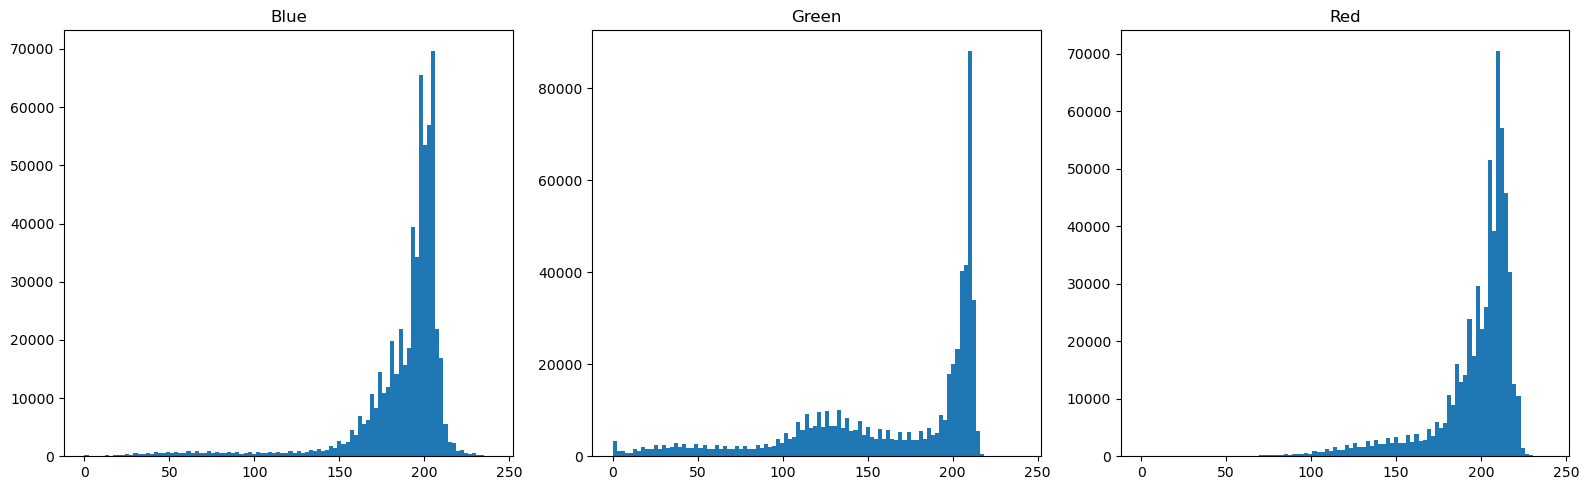

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histograma do canal azul
axes[0].hist(blue_channel.flat, bins=100, range=(0, 240))
axes[0].set_title('Blue')

# Histograma do canal verde
axes[1].hist(green_channel.flat, bins=100, range=(0, 240))
axes[1].set_title('Green')

# Histograma do canal vermelho
axes[2].hist(red_channel.flat, bins=100, range=(0, 240))
axes[2].set_title('Red')

plt.tight_layout()
plt.show()


#.flat returns the flattened numpy array (1D)

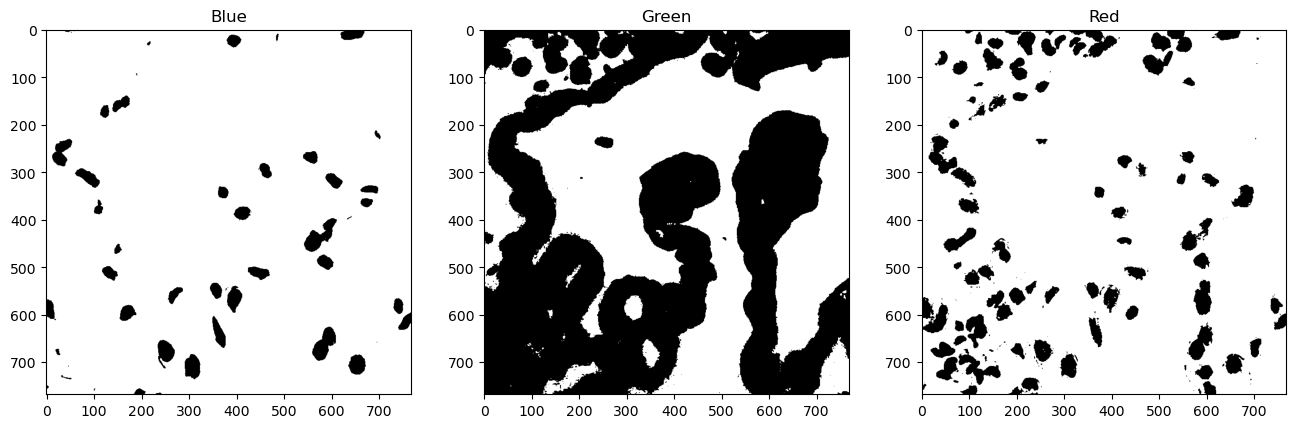

In [33]:
############# Segmentação manual ##########################

manual_ret_green, manual_thresh_green = cv2.threshold(green_channel, 195, 215, cv2.THRESH_BINARY) #cell membrane
manual_ret_blue, manual_thresh_blue = cv2.threshold(blue_channel, 125, 220, cv2.THRESH_BINARY) #cell marker
manual_ret_red, manual_thresh_red = cv2.threshold(red_channel, 170, 225, cv2.THRESH_BINARY) #cell nuclei


fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].imshow(manual_thresh_blue, cmap='gray')
axes[0].title.set_text('Blue')

axes[1].imshow(manual_thresh_green, cmap='gray')
axes[1].title.set_text('Green')


axes[2].imshow(manual_thresh_red, cmap='gray')
axes[2].title.set_text('Red')

plt.tight_layout()
plt.show()

####################################################################

threshold values of B: 137.0, G: 148.0, R: 173.0


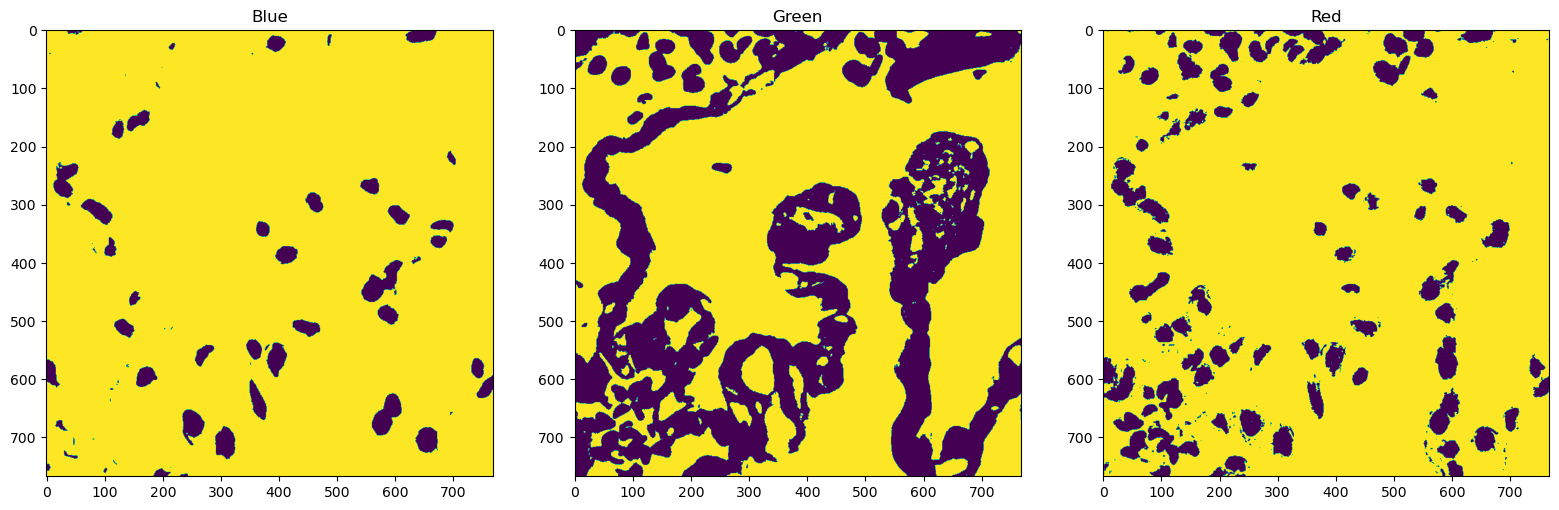

In [37]:
############# Segmentação automática (OTSU) ##########################

ret_blue, thresh_blue = cv2.threshold(blue_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_green, thresh_green = cv2.threshold(green_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_red, thresh_red = cv2.threshold(red_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(f'threshold values of B: {ret_blue}, G: {ret_green}, R: {ret_red}')

regions_blue=np.digitize(blue_channel, bins=np.array([ret_blue]))
regions_green=np.digitize(green_channel, bins=np.array([ret_green]))
regions_red=np.digitize(red_channel, bins=np.array([ret_red]))

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].imshow(regions_blue)
axes[0].title.set_text('Blue')

axes[1].imshow(regions_green)
axes[1].title.set_text('Green')

axes[2].imshow(regions_red)
axes[2].title.set_text('Red')

plt.tight_layout()
plt.show()

####################################################################

### Segmentação de imagem de múltiplos canais e operadores morfológicos

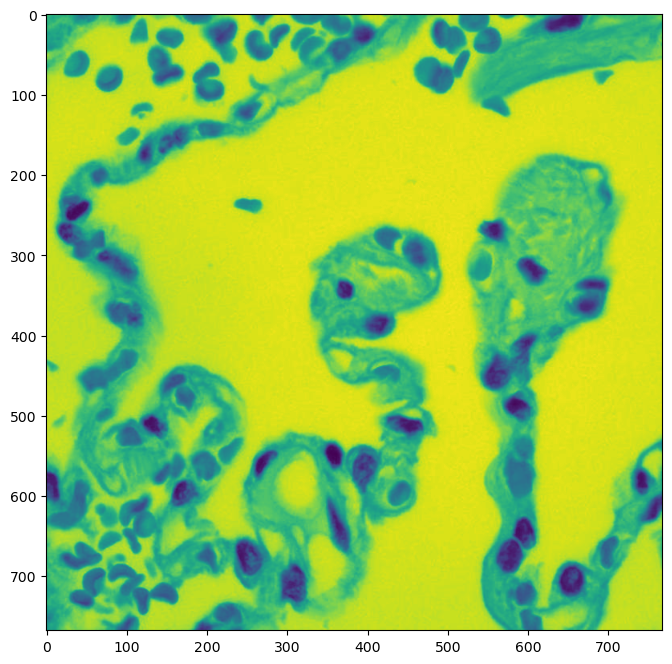

In [38]:
color_img = cv2.imread("../Images_data/single_prediction/lung_cancer_type_3.jpeg")
img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(img)

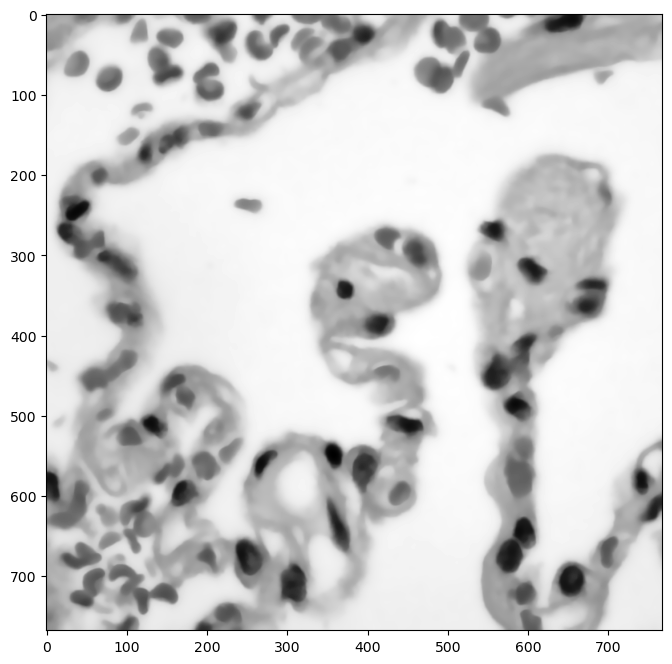

In [39]:
denoised_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, max_num_iter=200)

plt.figure(figsize=(8, 8))
plt.imshow(denoised_img, cmap='gray')

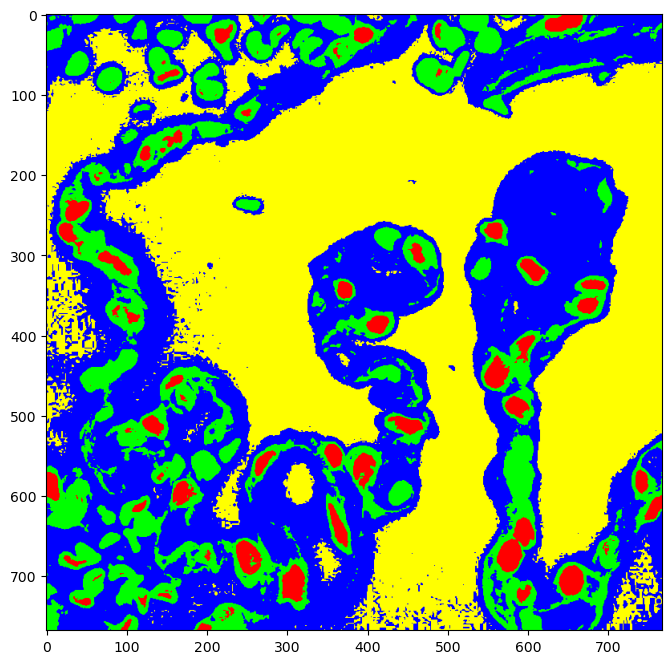

In [40]:
##################MANUAL########################

#Can perform manual segmentation but auto works fine

region1 = (img >= 0) & (img <75)
region2 = (img >= 75) & (img <140)
region3 = (img >= 140) & (img <200)
region4 = (img >= 200) & (img <=255)

all_regions = np.zeros((img.shape[0], img.shape[1], 3)) #Create 3 channel blank image of same size as original

all_regions[region1] = (1,0,0)
all_regions[region2] = (0,1,0)
all_regions[region3] = (0,0,1)
all_regions[region4] = (1,1,0)

plt.figure(figsize=(8, 8))
plt.imshow(all_regions)

##############################################

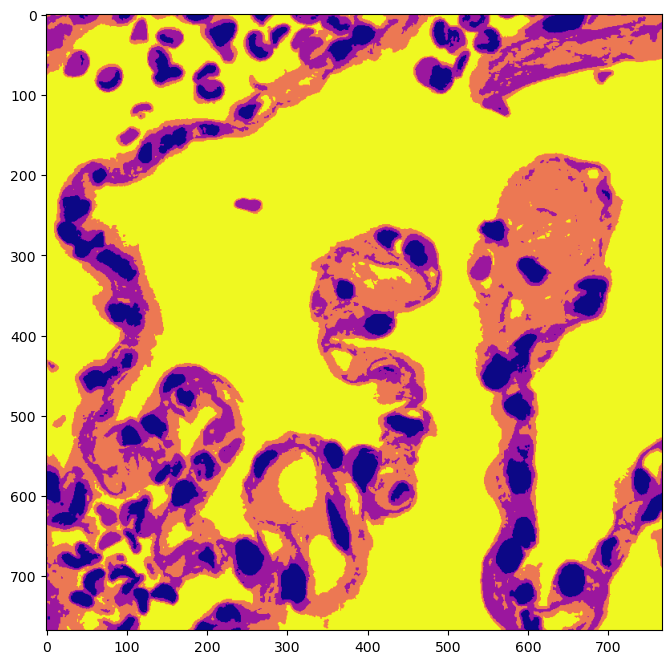

In [41]:
########################AUTO###########################

# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(img, classes=4)

# Digitize (segment) original image into multiple classes.
# np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.

regions = np.digitize(img, bins=thresholds)

plt.figure(figsize=(8, 8))
plt.imshow(regions, cmap='plasma')

## Segmentação com base em texturas

<h3> <b>GABOR</b> - A great filter for texture but usually efficient if we know exact parameters. Good choice for generating features for machine learning


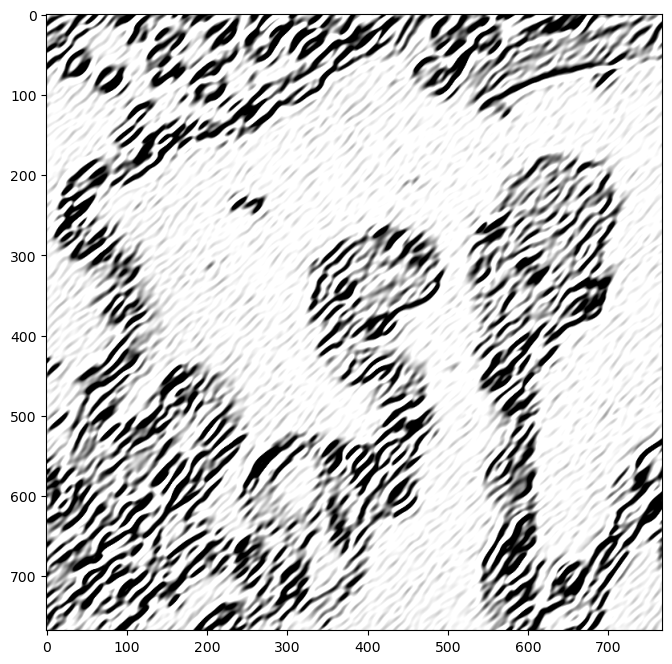

In [52]:
ksize=45
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)

plt.figure(figsize=(8, 8))
plt.imshow(filtered_image, cmap='gray')

<h3><b>Entropy</b></h3> <hb>
Entropy quantifies disorder. Since cell region has high variation in pixel values the entropy would be higher compared to scratch region

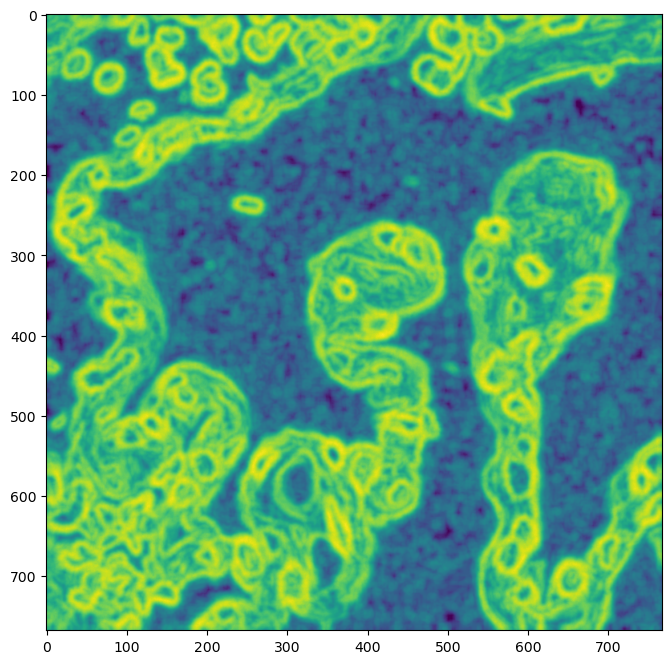

In [57]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(img, disk(6))

plt.figure(figsize=(8, 8))
plt.imshow(entropy_img)

(array([1.1900e+02, 8.6000e+01, 2.0000e+01, 4.2000e+01, 7.9000e+01,
        8.9000e+01, 1.4500e+02, 1.6000e+02, 2.2700e+02, 2.1400e+02,
        2.8200e+02, 3.8900e+02, 4.6800e+02, 5.9700e+02, 6.9000e+02,
        8.8400e+02, 9.9600e+02, 1.4040e+03, 1.7710e+03, 2.3030e+03,
        2.7250e+03, 3.2480e+03, 4.0020e+03, 4.7950e+03, 5.6130e+03,
        6.9110e+03, 8.3530e+03, 1.0155e+04, 1.1434e+04, 1.2872e+04,
        1.4139e+04, 1.4975e+04, 1.6105e+04, 1.6312e+04, 1.6006e+04,
        1.4979e+04, 1.3850e+04, 1.2503e+04, 1.0653e+04, 8.6560e+03,
        7.5520e+03, 6.1780e+03, 4.7250e+03, 4.1860e+03, 3.8470e+03,
        3.4940e+03, 3.4090e+03, 3.5460e+03, 3.6700e+03, 3.9000e+03,
        4.2220e+03, 4.5430e+03, 4.8790e+03, 5.1060e+03, 5.6320e+03,
        5.9800e+03, 6.4430e+03, 6.9380e+03, 7.4100e+03, 7.9530e+03,
        8.5740e+03, 8.9790e+03, 9.4510e+03, 9.7970e+03, 1.0332e+04,
        1.0789e+04, 1.0977e+04, 1.1448e+04, 1.1796e+04, 1.1832e+04,
        1.1811e+04, 1.1983e+04, 1.1790e+04, 1.18

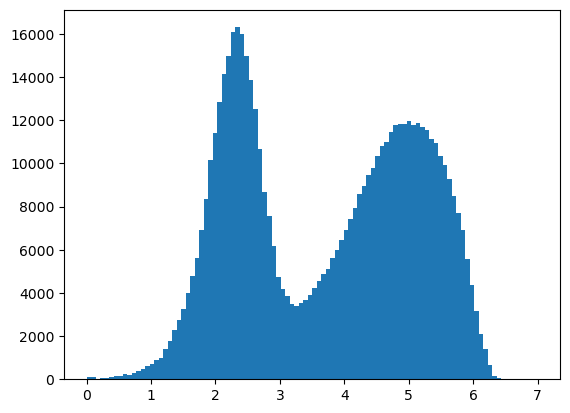

In [64]:
plt.hist(entropy_img.flat, bins=100, range=(0,7))  #.flat returns the flattened numpy array (1D)

Scratched area is:  271895 Square pixels
Scratched area in sq. microns is:  55058.7375 Square pixels


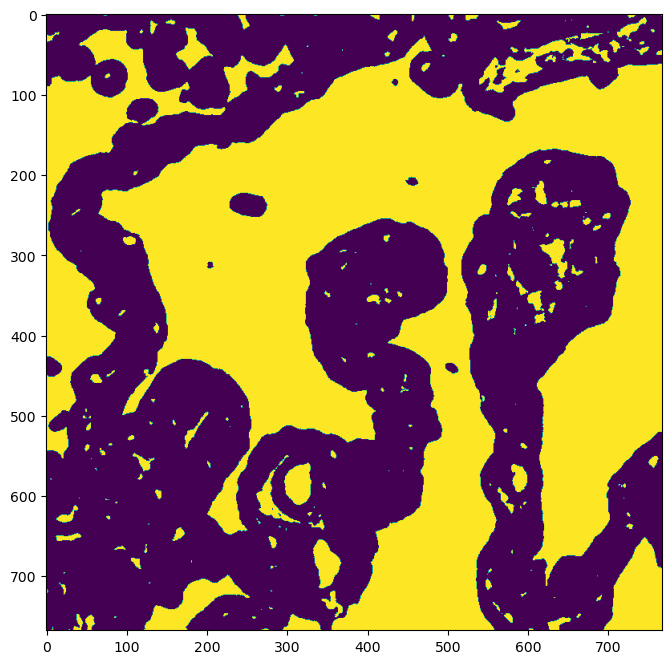

In [65]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(entropy_img)

# Now let us binarize the entropy image 
binary = entropy_img <= thresh

plt.figure(figsize=(8, 8))
plt.imshow(binary)

# Sum all pixels in the scratch region (values =1)
scratch_area = np.sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")

scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")

## Segmentação e medidas 

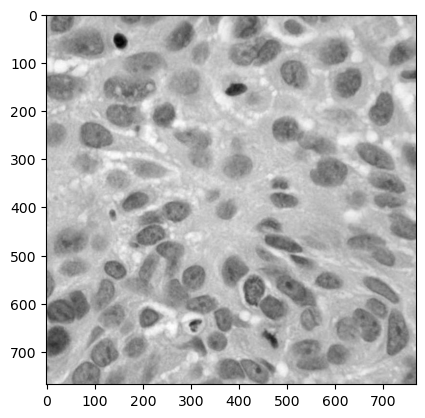

In [82]:
from skimage.color import label2rgb, rgb2gray
from skimage import measure, io, img_as_ubyte

image = img_as_ubyte(rgb2gray(io.imread("../Images_data/single_prediction/lung_cancer_type_1.jpeg")))

plt.imshow(image, cmap='gray')

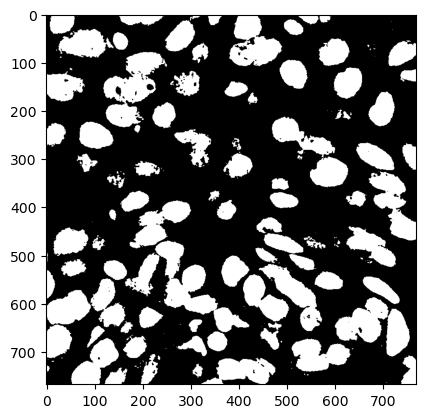

In [91]:
#Generate thresholded image
threshold = threshold_otsu(image)
thresholded_img = image < threshold

plt.imshow(thresholded_img,  cmap="gray")

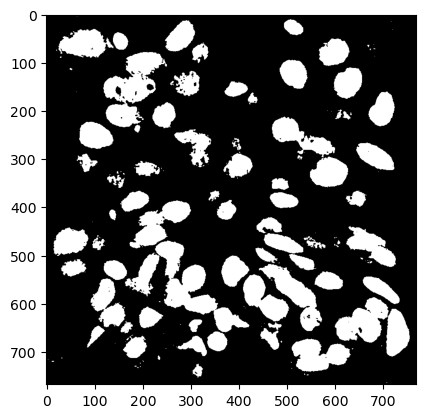

In [90]:
# Remove edge touching regions

from skimage.segmentation import clear_border

edge_touching_removed = clear_border(thresholded_img)

plt.imshow(edge_touching_removed, cmap="gray")

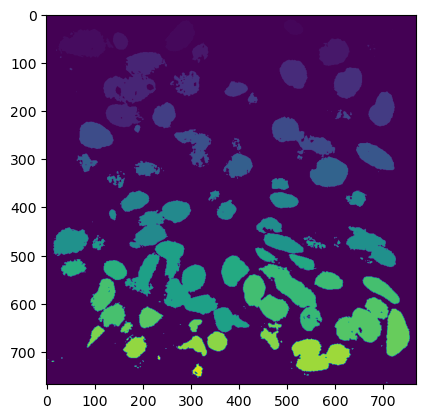

In [85]:
#Label connected regions of an integer array using measure.label
#Labels each connected entity as one object
#Connectivity = Maximum number of orthogonal hops to consider a pixel/voxel as a neighbor. 
#If None, a full connectivity of input.ndim is used, number of dimensions of the image
#For 2D image it would be 2

label_image = measure.label(edge_touching_removed, connectivity=image.ndim)

plt.imshow(label_image)

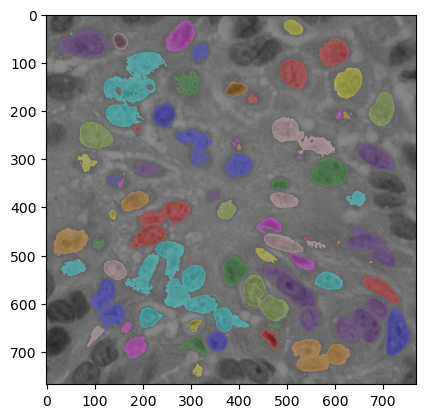

In [86]:
#Return an RGB image where color-coded labels are painted over the image.
#Using label2rgb

image_label_overlay = label2rgb(label_image, image=image)
plt.imshow(image_label_overlay)

In [93]:
# Compute image properties and return them as a pandas-compatible table.
# Available regionprops: area, bbox, centroid, convex_area, coords, eccentricity,
# equivalent diameter, euler number, label, intensity image, major axis length, 
# max intensity, mean intensity, moments, orientation, perimeter, solidity, and many more

props = measure.regionprops_table(label_image, image, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity'])

import pandas as pd

df = pd.DataFrame(props)
df

label    area  equivalent_diameter  mean_intensity  solidity
0        1     2.0             1.595769      135.000000  1.000000
1        2     2.0             1.595769      135.000000  1.000000
2        3   944.0            34.668979      113.133475  0.964249
3        4  2621.0            57.768165      107.679130  0.946551
4        5     1.0             1.128379      135.000000  1.000000
..     ...     ...                  ...             ...       ...
167    168     2.0             1.595769      135.000000  1.000000
168    169     5.0             2.523133      134.400000  1.000000
169    170     1.0             1.128379      135.000000  1.000000
170    171     7.0             2.985411      134.285714  1.000000
171    172     2.0             1.595769      135.000000  1.000000

[172 rows x 5 columns]

In [94]:
# To delete small regions...
df = df[df['area'] > 50]
df

label    area  equivalent_diameter  mean_intensity  solidity
2        3   944.0            34.668979      113.133475  0.964249
3        4  2621.0            57.768165      107.679130  0.946551
5        6  4340.0            74.336126      116.453226  0.839296
8        9   871.0            33.301526       63.104478  0.964563
10      11  2653.0            58.119743      114.542405  0.930551
..     ...     ...                  ...             ...       ...
141    142  1313.0            40.887205      112.899467  0.962610
143    144  1518.0            43.963367      118.090250  0.856659
144    145  1182.0            38.793932      113.122673  0.759640
146    147  5433.0            83.171572      115.678815  0.841412
162    163   343.0            20.897875      128.411079  0.814727

[69 rows x 5 columns]

In [97]:
# Convert to micron scale
df['area_sq_microns'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)

# Save csv
df.to_csv('lung_cancer_type_2_measurements.csv')

C:\Users\ana220069\AppData\Local\Temp\ipykernel_13328\1477501244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_sq_microns'] = df['area'] * (scale**2)
C:\Users\ana220069\AppData\Local\Temp\ipykernel_13328\1477501244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)


In [99]:
#######################################

Number of blobs detected are :  64


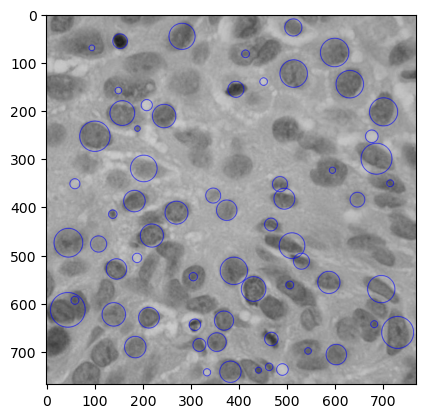

In [98]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

"""

https://www.learnopencv.com/blob-detection-using-opencv-python-c/

BLOB stands for Binary Large OBject and refers to a group of connected pixels in a binary image.
A Blob is a group of connected pixels in an image that share some common
property ( E.g grayscale value ). In the image above, the dark connected regions are blobs, 
and the goal of blob detection is to identify and mark these regions.

How it works:
    1. Threshold input images to binary.
    2. Grouping: connected white/black pixels are grouped together. 
    3. Merging: blobs located closer than minDistBetweenBlobs are merged.
    4. Center & Radius Calculation :  The centers and radii of the new merged blobs are computed and returned.
    
Can be filtered by color, size or shape

"""


# The input image.
image = cv2.imread("../Images_data/single_prediction/lung_cancer_type_1.jpeg", 0)

# Extract only blue channel as DAPI / nuclear (blue) staining is the best
# channel to perform cell count.


# No need to pre-threshold as blob detector has build in threshold.
# We can supply a pre-thresholded image.

# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Define thresholds
# Can define thresholdStep. See documentation. 
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 50
params.maxArea = 10000

# Filter by Color (black=0)
params.filterByColor = False  #Set true for cast_iron as we'll be detecting black regions
params.blobColor = 0

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5
params.maxConvexity = 1

# Filter by InertiaRatio
params.filterByInertia = True
params.minInertiaRatio = 0.1
params.maxInertiaRatio = 1

# Distance Between Blobs
params.minDistBetweenBlobs = 1

# Setup the detector with parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print("Number of blobs detected are : ", len(keypoints))


# Draw blobs
img_with_blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_with_blobs)
cv2.imshow("Keypoints", img_with_blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save result
#cv2.imwrite("particle_blobs.jpg", img_with_blobs)